# Medical Cost Personal Insurance Project

Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
Columns                                            
•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?

Dataset Link-
https://github.com/dsrscientist/dataset4
https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv


## Step 1: importing the files

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR #support vector regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('D:\Swapnil Dixit\Data Science\Data Trained\Internship -Fliprobo\Projects\First Phase Project\dataset4-main\medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#checking for null
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There in no null value in a dataset

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Step 2 : EDA


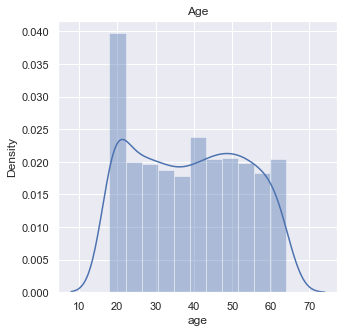

In [7]:
#distribution of age - will tell us distribtion of the dataset
sns.set()
plt.figure(figsize=(5,5)) 
sns.distplot(df['age'])
plt.title('Age')
plt.show()

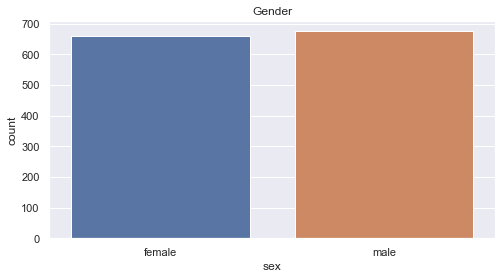

In [8]:
#Gender is in character hence cannot use categorical 
plt.figure(figsize=(8,4))
sns.countplot(x='sex',data=df)
plt.title('Gender')
plt.show()

In [9]:
# how many male and female
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

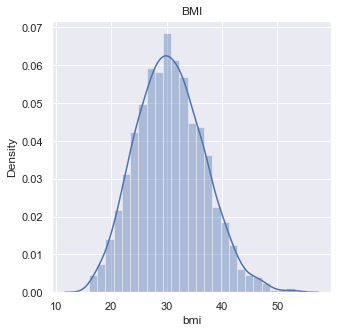

In [10]:
#BMI
plt.figure(figsize=(5,5))
sns.distplot(df['bmi'])
plt.title('BMI')
plt.show()

Range of Normal BMI is 18.5 to 24.9 (Source: Google)

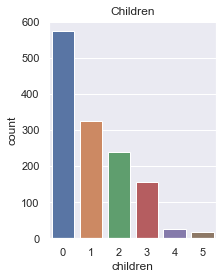

In [11]:
#Count plot for children
plt.figure(figsize=(3,4))
sns.countplot(x='children',data=df)
plt.title('Children')
plt.show()

In [12]:
#Number of children
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

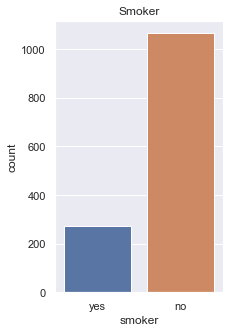

In [13]:
#Smoker
sns.set()
plt.figure(figsize=(3,5))
sns.countplot(df['smoker'])
plt.title('Smoker')
plt.show()

In [14]:
#Smoker count
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

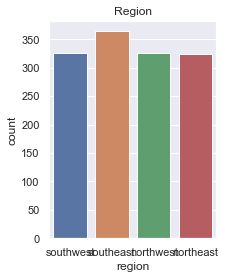

In [15]:
#Count plot for region
plt.figure(figsize=(3,4))
sns.countplot(x='region',data=df)
plt.title('Region')
plt.show()

In [16]:
#count of region customer wise
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

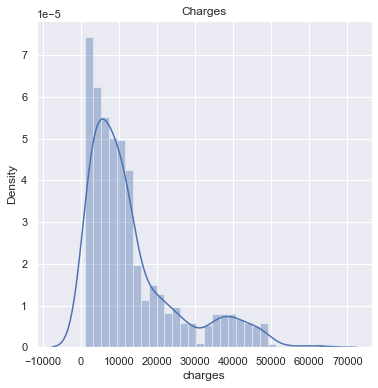

In [17]:
# Charges distribution plot
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges')
plt.show()

Have to convert the following  
Gender  
male = 0 
female = 1

smoker  
Yes = 0  
No = 1  

Region  
Southeast = 0  
southwest = 1  
northeast = 0  
northwest = 1  


In [18]:
#Replacing Sex Column data
df.replace({'sex':{'male':0,'female':1}},inplace=True)

#Replacing Smoker Column data
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)

#Replacing Region Column data
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [19]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [20]:
#Seperation of features and variable / target variable

x=df.drop(columns='charges',axis=1)
y=df['charges']

In [21]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [23]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [51]:
#Splitting the data into train and test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [52]:
print(x.shape)
#x.reshape(-1,1)
#print(x.shape)
#print("----------")
print(x_train.shape)
print(x_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(1338, 6)
(1070, 6)
(268, 6)
(1338,)
(1070,)
(268,)


### Training the model

In [53]:
reg=LinearRegression()
reg

LinearRegression()

In [54]:
reg.fit(x,y)

LinearRegression()

### Model Evaluation

In [55]:
pred=reg.predict(x_train)

In [58]:
print(y_train.shape)
print(pred.shape)

(1070,)
(1070,)


In [59]:
#R2 squared value
r2_train = metrics.r2_score(y_train,pred)
print('R Squared Value:',r2_train)



R Squared Value: 0.7512580944694703


In [62]:
svm=SVR()
svm.fit(x_train,y_train)

SVR()

In [63]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [65]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

### Prediction on Test Data

In [71]:
y_pred1 = reg.predict(x_test)
y_pred2 = svm.predict(x_test)
y_pred3 = rf.predict(x_test)
y_pred4 = gbr.predict(x_test)

df1 = pd.DataFrame({"Actual":y_test, "reg":y_pred1, "svm":y_pred2, "rf":y_pred3, "gbr":y_pred4})

In [72]:
df1

,Actual,reg,svm,rf,gbr
17,2395.17155,1505.634311,9195.367327,4086.088980,3997.205442
1091,11286.53870,11874.657052,9380.383114,12462.125401,12159.050017
273,9617.66245,10128.781952,9349.482569,15480.890909,11134.165033
270,1719.43630,1955.534580,9182.203618,2309.074481,3009.267748
874,8891.13950,7634.659822,9307.373685,9877.180790,10056.388319
...,...,...,...,...,...
232,1727.78500,-1728.431890,9190.275192,2148.773597,7351.687771
323,11566.30055,16005.664424,9391.639091,15714.413982,13566.571354
1337,29141.36030,37325.222108,9408.339335,28472.072387,28319.448971
1066,8978.18510,12802.161794,9341.251773,10056.915910,10065.341206


### Visualization of Predicted Values

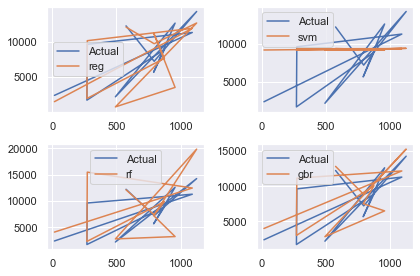

In [77]:
plt.subplot(2,2,1)
plt.plot(df1['Actual'].iloc[0:11],label="Actual")
plt.plot(df1['reg'].iloc[0:11], label="reg")
plt.legend()

plt.subplot(2,2,2)
plt.plot(df1['Actual'].iloc[0:11],label="Actual")
plt.plot(df1['svm'].iloc[0:11], label="svm")
plt.legend()

plt.subplot(2,2,3)
plt.plot(df1['Actual'].iloc[0:11],label="Actual")
plt.plot(df1['rf'].iloc[0:11], label="rf")
plt.legend()

plt.subplot(2,2,4)
plt.plot(df1['Actual'].iloc[0:11],label="Actual")
plt.plot(df1['gbr'].iloc[0:11], label="gbr")
plt.legend()

plt.tight_layout()

By looking these above graphs we can observe that Model 3 and Model 4 appears more suitable and closer to actual values

Comparing both model 3 and model 4 - model 4 is better than model 3

### Evaluating the Algorithm

In [80]:
rs1 = metrics.r2_score(y_test,y_pred1)
rs2 = metrics.r2_score(y_test,y_pred2)
rs3 = metrics.r2_score(y_test,y_pred3)
rs4 = metrics.r2_score(y_test,y_pred4)

In [81]:
print(rs1, rs2, rs3, rs4)

0.7469081295022834 -0.08038132828590361 0.8387182024756403 0.8678173158974779


From these above R-Squared values we can see that Model 4 is performing better than other 3 models

In [84]:
# Calculating mean absolute error

mae1 = metrics.mean_absolute_error(y_test,y_pred1)
mae2 = metrics.mean_absolute_error(y_test,y_pred2)
mae3 = metrics.mean_absolute_error(y_test,y_pred3)
mae4 = metrics.mean_absolute_error(y_test,y_pred4)

In [85]:
print(mae1, mae2, mae3, mae4)

4261.706042593258 8467.075338758827 2724.177736096419 2391.3464617403424


From these above mean absolute value error we can see that Model 4 is performing better than other 3 models as its value is lesser than other 3 values and lesser value is consdiered as better

### Predictive System for New Data

In [87]:
new_data = {"age":38, "sex":1, "bmi":43.21, "children":2, "smoker":1, "region":3}
df=pd.DataFrame(new_data, index=[0])
df

,age,sex,bmi,children,smoker,region
0,38,1,43.21,2,1,3


In [88]:
new_pred = gbr.predict(df)
print(new_pred)

[8549.31465486]


### Saving the Mod
Now we will train the model for entire dataset with gradient boosting regressor

In [89]:
gbr = GradientBoostingRegressor()
gbr.fit(x,y)

GradientBoostingRegressor()

Now the model is trined for entire dtaset

In [90]:
import joblib
#Saving the model
joblib.dump(gbr, "MCPI")

['MCPI']

Now in future we can perform prediction using this saved model

In [92]:
model=joblib.load("MCPI")

In [93]:
model.predict(df)

array([10778.18651345])